# Defining the black scholes function and calculating the option prices for a given stock prices and a given strike price 


C:\Users\ABILFAZAL UNWALA\AppData\Local\Temp\ipykernel_860\2986204238.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data=data.resample('H').last()


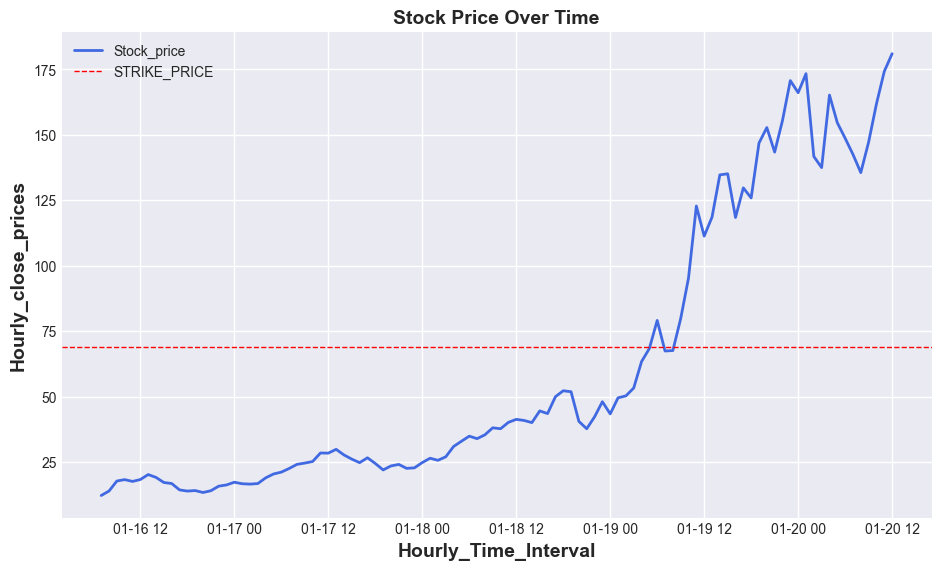

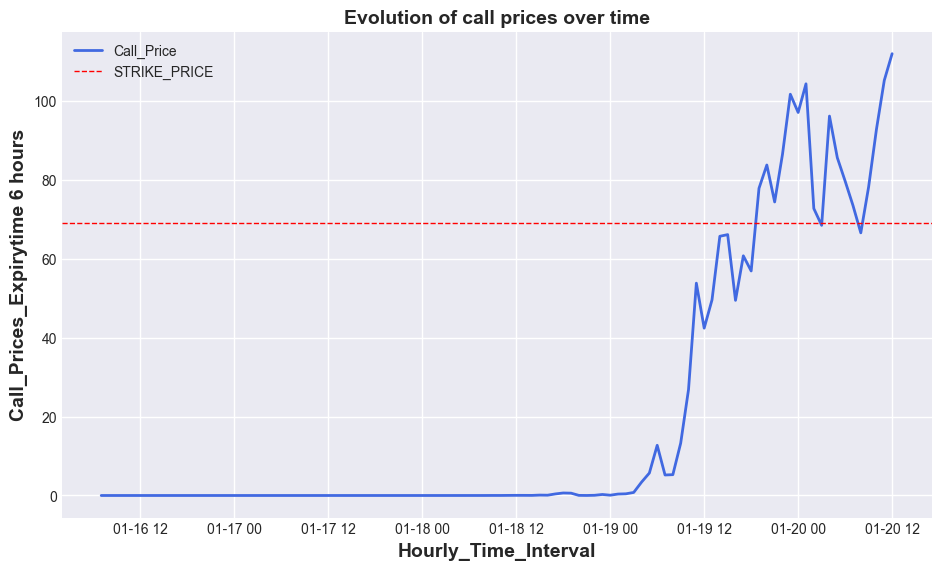

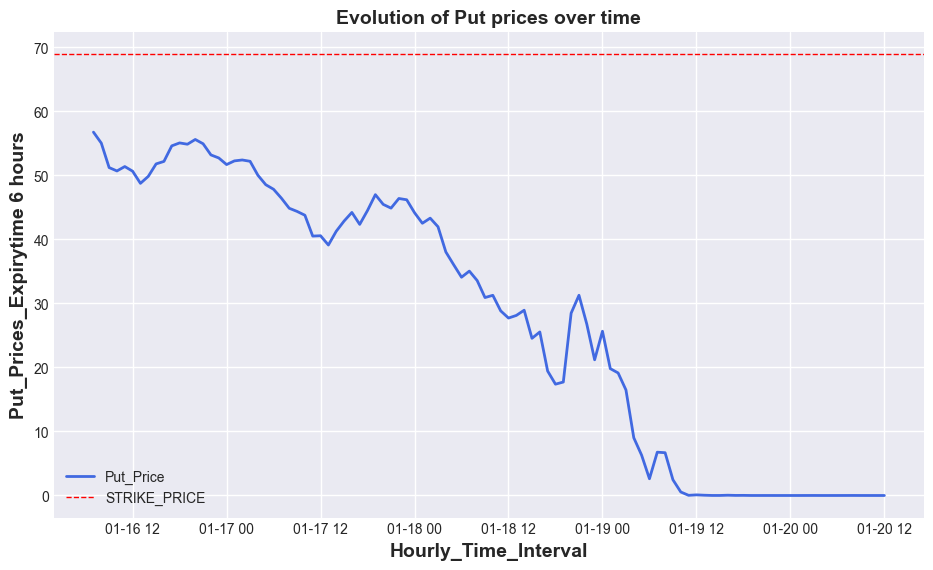

In [116]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
import scipy.stats as stats 
import requests
import seaborn as sns

def BSM(stock,strike,risk_free,time,volatility):
    stock_price = stock
    strike_price = strike
    risk_free_rate = risk_free
    time_to_maturity = time
    volatility = volatility
    price={}

    d1 = (np.log(stock_price/strike_price) + (risk_free_rate + volatility**2/2)*time_to_maturity)/(volatility*np.sqrt(time_to_maturity))
    d2 = d1 - volatility*np.sqrt(time_to_maturity)

    call_price = stock_price*stats.norm.cdf(d1) - strike_price*np.exp(-risk_free_rate*time_to_maturity)*stats.norm.cdf(d2)
    put_price = strike_price*np.exp(-risk_free_rate*time_to_maturity)*stats.norm.cdf(-d2) - stock_price*stats.norm.cdf(-d1)
    price['Call_Price'] = call_price
    price['Put_Price'] = put_price
    return price

## Fetching data from Pre loaded csv file for the apple stock

data=pd.read_csv('APPL_1D.csv')
data['time']=pd.to_datetime(data['time'],unit='ms')
data.set_index('time',inplace=True)

# fetching hourly data fro volatility calculation
hourly_data=data.resample('H').last()
hourly_data['log_return']=np.log(hourly_data['close']/hourly_data['close'].shift(1))
hourly_data.dropna(inplace=True)
volatility_hourly=hourly_data['log_return'].std(ddof=1)
volatility_hourly


# implementing BSM model for each hourly close price and calculating the respective call and put option prices for the given close prices 

option_values=pd.DataFrame()
strike=69
risk_free_hourly=1/32760    # assuming 5% annual treasury rate 
Time_expiry=6

hourly_data['option_prices']=hourly_data['close'].apply(BSM,args=(strike,risk_free_hourly,Time_expiry,volatility_hourly))
hourly_data['call_price']=hourly_data['option_prices'].apply(lambda x:x['Call_Price'])
hourly_data['put_price']=hourly_data['option_prices'].apply(lambda x:x['Put_Price'])

hourly_data.drop(columns=['option_prices'],inplace=True)
hourly_data.dropna(inplace=True)

option_values['Close']=hourly_data['close']
option_values['call_price']=hourly_data['call_price']
option_values['put_price']=hourly_data['put_price']
option_values.to_csv('OPTION_PRICES.csv')


# plotting the above given data for visula understanding

# PLOT for the hourly data and stock evolution
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

plt.figure(figsize=(10,6))
plt.plot(hourly_data.index,hourly_data['close'],label='Stock_price',linewidth=2,color='royalblue')
plt.xlabel('Hourly_Time_Interval',fontdict={'fontsize':14,'fontweight':'bold'})
plt.ylabel('Hourly_close_prices',fontdict={'fontsize':14,'fontweight':'bold'})
plt.axhline(strike,color='red',linestyle='--',linewidth=1,label='STRIKE_PRICE')
plt.title('Stock Price Over Time',fontdict={'fontsize':14,'fontweight':'bold'})
plt.legend()
plt.show()


# Plotting the Call prices vs time 

plt.figure(figsize=(10,6))
plt.plot(hourly_data.index,hourly_data['call_price'],label='Call_Price',linewidth=2,color='royalblue')
plt.xlabel('Hourly_Time_Interval',fontdict={'fontsize':14,'fontweight':'bold'})
plt.ylabel(f'Call_Prices_Expirytime {Time_expiry} hours',fontdict={'fontsize':14,'fontweight':'bold'})
plt.axhline(strike,color='red',linestyle='--',linewidth=1,label='STRIKE_PRICE')
plt.title('Evolution of call prices over time',fontdict={'fontsize':14,'fontweight':'bold'})
plt.legend()
plt.show()



# plotting the put prices vs time

plt.figure(figsize=(10,6))
plt.plot(hourly_data.index,hourly_data['put_price'],label='Put_Price',linewidth=2,color='royalblue')
plt.xlabel('Hourly_Time_Interval',fontdict={'fontsize':14,'fontweight':'bold'})
plt.ylabel(f'Put_Prices_Expirytime {Time_expiry} hours',fontdict={'fontsize':14,'fontweight':'bold'})
plt.axhline(strike,color='red',linestyle='--',linewidth=1,label='STRIKE_PRICE')
plt.title('Evolution of Put prices over time',fontdict={'fontsize':14,'fontweight':'bold'})
plt.legend()
plt.show()
